# Réseau de neurones à 2 couches
### source : https://www.youtube.com/watch?v=LXvSdSKw9dk&ab_channel=MachineLearnia
### (vidéos 8 & 9)

<img src="img_dl2.png" alt="2 layer neural net image" width=500 height=400> </img>

$\Large
X = 
\begin{bmatrix}
x_1^{1} & x_1^{2} & ... & x_1^{m} \\
x_2^{1} & x_2^{2} & ... & x_2^{m}
\end{bmatrix}
$
&emsp;
$\Large X \in \mathbb{R}^{n^{[0]} \times m}$

### $ W^{[1]} \in \mathbb{R}^{n^{[1]} \times n^{[0]}}$ &nbsp; $;$ &nbsp; $ W^{[2]} \in \mathbb{R}^{n^{[2]} \times n^{[1]}}$ &nbsp; $avec: $ &nbsp; $ Z^{[1]} = W^{[1]}.X + b^{[1]} $ &ensp; $et$ &ensp;  $ Z^{[2]} = W^{[2]}.A^{[1]} + b^{[2]} $
### $ b^{[1]} \in \mathbb{R}^{n^{[1]} \times 1} $ &emsp; &ensp; $;$ &nbsp; $ b^{[2]} \in \mathbb{R}^{n^{[2]} \times 1}$ &emsp; &emsp; &emsp; &emsp; &emsp; $ A^{[1]} = \dfrac{1}{1+e^{-Z^{[1]}}}$ &emsp; &ensp; $et$ &emsp; $ A^{[2]} = \dfrac{1}{1+e^{-Z^{[2]}}}$

### Fonction Log-Loss à minimiser : &nbsp; &nbsp; &nbsp; $\normalsize L=-\dfrac{1}{m} \sum_{i=0}^{m} y_i log(A^{[2]}) + (1-y_i) log(1-A^{[2]}) $

$\Large 
\left\{
    \begin{array}{ll}
        \frac{\partial L}{\partial W^{[2]}} = \frac{1}{m} dz_2 . A^{[1]^{T}} \\
        \\
        \frac{\partial L}{\partial b^{[2]}} = \frac{1}{m} \sum_{_{axe1}} dz_2
    \end{array}
\right.
$
&emsp; $\Large avec$ &ensp; $\Large dz_2 = (A^{[2]}-y) $

$\Large 
\left\{
    \begin{array}{ll}
        \frac{\partial L}{\partial W^{[1]}} = \frac{1}{m} dz_1 . X^{T}
       \\
        \\
        \frac{\partial L}{\partial b^{[1]}} = \frac{1}{m} \sum_{_{axe1}} dz_1
    \end{array}
\right.
$
&emsp; $\Large avec$ &ensp; $\Large dz_1 = W^{[2]^{T}}.dz_2 \times A^{[1]}(1 - A^{[1]}) $

### C'est parti, on modifie le code du 1er notebook pour l'adapter au cas d'un réseau de neurones

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})


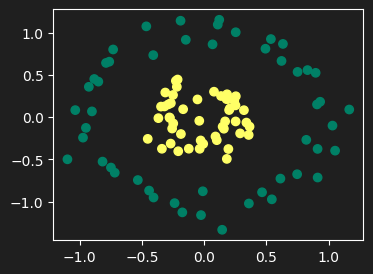

In [82]:
#X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X, y = make_circles(n_samples=100, noise=.1, factor=.3,random_state=0)
X = X.T 
y = y.reshape((y.shape[0],1))
y = y.T
plt.figure(figsize=(4,3))
plt.scatter(X[0,:],X[1,:],c=y, cmap='summer')
plt.show()

In [3]:
def initialisation(n_layer0, n_layer1, n_layer2):
    
    W1 = np.random.randn(n_layer1, n_layer0)
    b1 = np.random.randn(n_layer1,1)
    W2 = np.random.randn(n_layer2,n_layer1)
    b2 = np.random.randn(n_layer2,1)
    
    parametres = {
        'W1': W1,
        'W2': W2,
        'b1': b1,
        'b2': b2
    }
    
    return parametres

parametres = initialisation(2,3,1)

In [4]:
parametres

{'W1': array([[-0.30425426,  0.44999276],
        [-0.74464225, -0.51982534],
        [-0.39509715, -1.7367068 ]]),
 'W2': array([[1.69450281, 0.31735184, 0.00424006]]),
 'b1': array([[-0.47508131],
        [-0.24747691],
        [ 0.11377607]]),
 'b2': array([[0.04310109]])}

In [5]:
# on renomme la fonction "model" en "forward propagation"
def forward_propagation(X,parametres):
    
    Z1 = parametres["W1"].dot(X) + parametres["b1"]
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = parametres["W2"].dot(A1) + parametres["b2"]
    A2 = 1 / (1 + np.exp(-Z2))
    
    activations = {
        "A1" : A1,
        "A2" : A2
    }
    return activations

In [6]:
y.shape

(1, 100)

In [7]:
activations = forward_propagation(X, parametres)

### Fonction coût

$\normalsize L=-\dfrac{1}{m} \sum_{i=0}^{m} y_i log(A^{[2]}) + (1-y_i) log(1-A^{[2]}) $

In [8]:
def log_loss(activations,y):
    eps = 1e-15
    L = (-1/(y.shape[1])) * np.sum(y * np.log(activations["A2"] + eps) + (1 - y) * np.log(1 - activations["A2"] + eps))
    return L

In [9]:
L = log_loss(activations, y)

In [10]:
L

0.9903729323340579

### <del>Le calcul des gradients</del> **Backward propagation** 😉

In [11]:
y.shape

(1, 100)

In [12]:
def back_propagation(X,y,activations, parametres):
    
    m = y.shape[1]
    
    dz2 = activations["A2"] - y
    dW2 = (1/m) * dz2.dot(activations["A1"].T)
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)
    
    dz1 = (parametres["W2"].T).dot(dz2) * activations["A1"]*(1-activations["A1"])
    dW1 = (1/m) * dz1.dot(X.T)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)
    
    gradients = {
        "dW1" : dW1,
        "dW2" : dW2,
        "db1" : db1,
        "db2" : db2
    }
    
    return gradients

In [13]:
gradients = back_propagation(X,y,activations,parametres)

### Fonction de prédiction :

In [14]:
def predict(X,parametres):
    activations = forward_propagation(X,parametres)
    return activations["A2"] >= 0.5

In [15]:
for p,g in zip(parametres.keys(),gradients.keys()):
    print(p, g)

W1 dW1
W2 dW2
b1 db1
b2 db2


### Descente de gradient

In [185]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

def neural_network(X_train, y_train, n_layer1, learning_rate=0.1, n_epochs=100, plot_loss_acc = False):
    
    n_layer0 = X_train.shape[0]
    n_layer2 = y_train.shape[0]
    
    parametres = initialisation(n_layer0,n_layer1,n_layer2)
    
    loss_test = []
    loss_train = []
    accuracy_hist_train = []
    accuracy_hist_test = []
    
    for i in tqdm(range(n_epochs)):
        
        activations = forward_propagation(X_train, parametres)
        
        #calcul des gradients:
        gradients = back_propagation(X_train, y_train, activations, parametres)
        
        #update des gradients:
        for p,g in zip(parametres.keys(),gradients.keys()):
            parametres[p] -= learning_rate * gradients[g]
        
        #calcul du coût et de l'accuracy, tous les 10 pas:
        if i % 10 == 0:
            # Train
            y_pred = predict(X_train, parametres)
            accuracy_hist_train.append(accuracy_score(y_train.flatten(), y_pred.flatten()))
            loss_train.append(log_loss(activations, y_train))
            # test
            #y_pred = predict(X_test, parametres)
            #A_test = forward_propagation(X_test, parametres)
            #accuracy_hist_test.append(accuracy_score(y_test.flatten(), y_pred.flatten()))
            #loss_test.append(log_loss(A_test, y_test))
    
    scores = {
        #"loss_test" : loss_test,
        "loss_train" : loss_train,
        #"accuracy_test" : accuracy_hist_test,
        "accuracy_train" : accuracy_hist_train
    }
            
    if plot_loss_acc == True:
        plt.figure(figsize=(12,4))
        plt.subplot(1,2,1)
        plt.plot(range(len(loss_train)),loss_train, label="Train loss function")
        plt.plot(range(len(loss_test)),loss_test, label="Test loss function")
        plt.title("Loss function")
        plt.legend()
        plt.subplot(1,2,2)
        plt.plot(range(len(accuracy_hist_train)),accuracy_hist_train, label="Train accuracy")
        plt.plot(range(len(accuracy_hist_test)),accuracy_hist_test, label="Test accuracy")
        plt.title("Accuracy")
        plt.legend()
        plt.show()
    
    return parametres, scores

100%|██████████| 10000/10000 [00:01<00:00, 5789.07it/s]


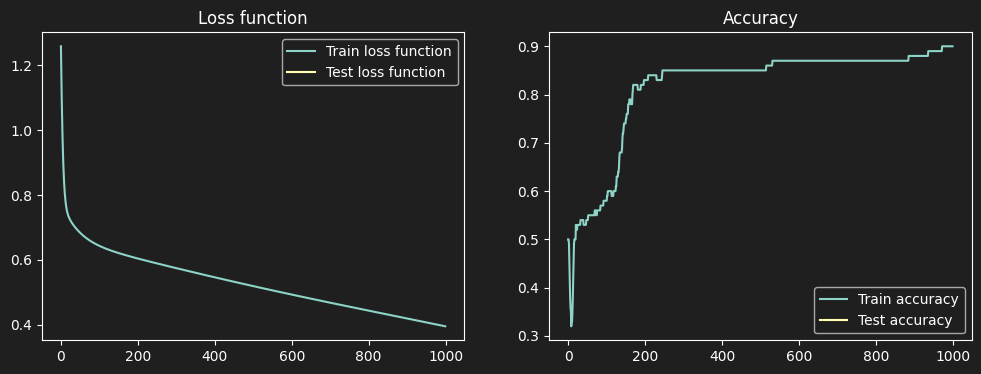

In [172]:
parametres_f, scores = neural_network(X,y,16,learning_rate=0.01,n_epochs=10000, plot_loss_acc=True)

### On plot la frontière de décision indirectement en utilisant le réseau de neurones sur un meshgrid de points pour prédire la valeur estimée de ces points, en utilisant 1 couleur par valeur de sortie prédite (y) on visualisera la forme du modèle
source : https://stats.stackexchange.com/questions/71335/decision-boundary-plot-for-a-perceptron/71339#71339

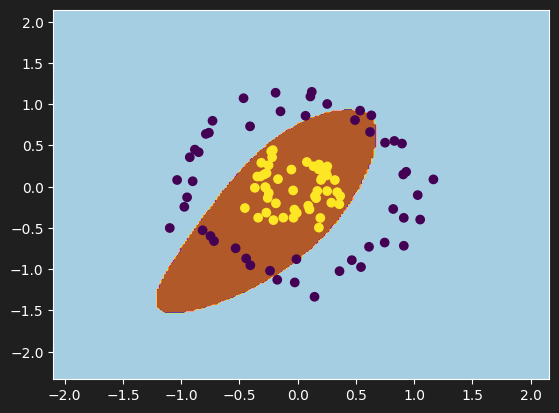

In [186]:
h = .02  # step size in the mesh
# create a mesh to plot in
x1_min, x1_max = X[0, :].min() - 1, X[0, :].max() + 1
x2_min, x2_max = X[1, :].min() - 1, X[1, :].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots()
Z = predict(np.c_[xx1.ravel(), xx2.ravel()].T, parametres_f)

# Put the result into a color plot
Z = Z.reshape(xx1.shape)
ax.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)
#ax.axis('off')
plt.scatter(X[0,:],X[1,:],c=y)

plt.show()

In [174]:
param_dict = {}
scores_dict = {}
layers = [1,2,4,8,16,32]
for n in layers:
    param_dict[f"{n}_layers"], scores_dict[f"{n}_scores"] = neural_network(X,y,n,learning_rate=.01,n_epochs=10000)

100%|██████████| 10000/10000 [00:01<00:00, 5329.72it/s]


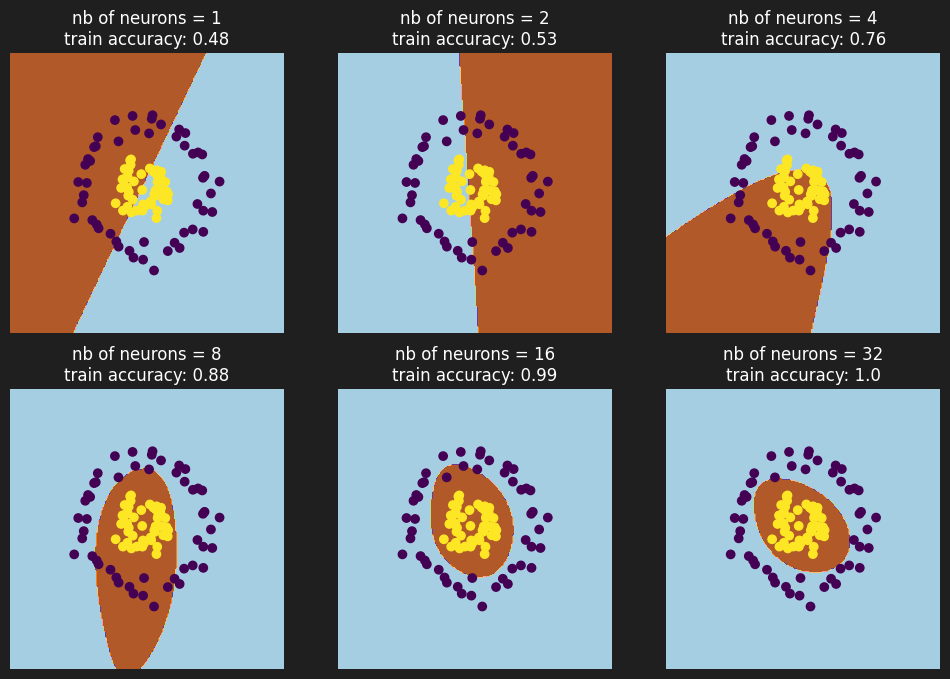

In [188]:
h = .02  # step size in the mesh
# create a mesh to plot in
x1_min, x1_max = X[0, :].min() - 1, X[0, :].max() + 1
x2_min, x2_max = X[1, :].min() - 1, X[1, :].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig = plt.figure(figsize=(12,8))

for i,n in enumerate(layers):
    plt.subplot(2,3,i+1)
    Z = predict(np.c_[xx1.ravel(), xx2.ravel()].T, param_dict[f"{n}_layers"])
    # Put the result into a color plot
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)
    plt.axis('off')
    plt.scatter(X[0,:],X[1,:],c=y)
    final_accuracy_train = scores_dict[f'{n}_scores']['accuracy_train'][-1]
    plt.title(f"nb of neurons = {n}\ntrain accuracy: {final_accuracy_train}")

plt.show()

# On utilise ce réseau de neurones sur le cas Chats/Chiens

In [194]:
def neural_network(X_train, y_train, X_test, y_test, n_layer1, learning_rate=0.1, n_epochs=100, plot_loss_acc=False):
    
    n_layer0 = X_train.shape[0]
    n_layer2 = y_train.shape[0]
    
    parametres = initialisation(n_layer0,n_layer1,n_layer2)
    
    loss_test = []
    loss_train = []
    accuracy_hist_train = []
    accuracy_hist_test = []
    
    for i in tqdm(range(n_epochs)):
        
        activations = forward_propagation(X_train, parametres)
        
        #calcul des gradients:
        gradients = back_propagation(X_train, y_train, activations, parametres)
        
        #update des gradients:
        for p,g in zip(parametres.keys(),gradients.keys()):
            parametres[p] -= learning_rate * gradients[g]
        
        #calcul du coût et de l'accuracy, tous les 10 pas:
        if i % 10 == 0:
            # Train
            y_pred = predict(X_train, parametres)
            accuracy_hist_train.append(accuracy_score(y_train.flatten(), y_pred.flatten()))
            loss_train.append(log_loss(activations, y_train))
            # test
            y_pred = predict(X_test, parametres)
            A_test = forward_propagation(X_test, parametres)
            accuracy_hist_test.append(accuracy_score(y_test.flatten(), y_pred.flatten()))
            loss_test.append(log_loss(A_test, y_test))
    
    scores = {
    "loss_test" : loss_test,
    "loss_train" : loss_train,
    "accuracy_test" : accuracy_hist_test,
    "accuracy_train" : accuracy_hist_train
    }
    
    if plot_loss_acc == True:   
        plt.figure(figsize=(12,4))
        plt.subplot(1,2,1)
        plt.plot(range(len(loss_train)),loss_train, label="Train loss function")
        plt.plot(range(len(loss_test)),loss_test, label="Test loss function")
        plt.title("Loss function")
        plt.legend()
        plt.subplot(1,2,2)
        plt.plot(range(len(accuracy_hist_train)),accuracy_hist_train, label="Train accuracy")
        plt.plot(range(len(accuracy_hist_test)),accuracy_hist_test, label="Test accuracy")
        plt.title("Accuracy")
        plt.legend()
        plt.show()
    
    return parametres, scores

In [190]:
import h5py

def load_data():
    train_dataset = h5py.File('datasets/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('datasets/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

In [191]:
X_train, y_train, X_test, y_test = load_data()

### Normalisation

In [192]:
X_train_reshape = X_train.reshape(X_train.shape[0],-1) / X_train.max()
X_test_reshape = X_test.reshape(X_test.shape[0],-1) / X_train.max()

In [193]:
X_train_reshape.shape

(1000, 4096)

100%|██████████| 8000/8000 [02:15<00:00, 59.14it/s]


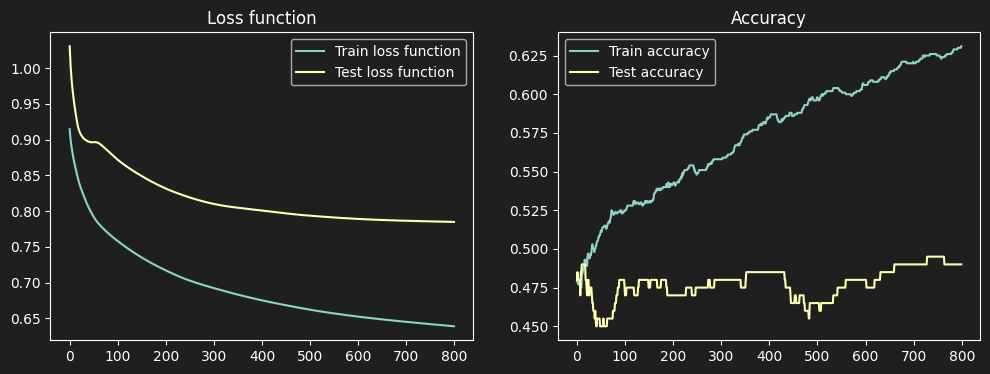

In [195]:
parametres_f_cc, scores_cc = neural_network(X_train_reshape.T, y_train.T, X_test_reshape.T, y_test.T, 32, learning_rate=0.01, n_epochs=8000, plot_loss_acc=True)